In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from numpy.random import multinomial

def bootstrap(series, n: int=1000):
    return multinomial(series.sum(), series/series.sum(), n)

In [21]:
import math

def cohens_d(d1, d2):
    
    # https://en.wikipedia.org/wiki/Effect_size#Cohen.27s_d
    
    n1 = len(d1)
    n2 = len(d2)

    s1 = (
        ((d1-d1.mean())**2).sum() /
        (n1-1)
    )

    s2 = (
        ((d2-d2.mean())**2).sum() /
        (n2-1)
    )

    s = math.sqrt(
        ((n1-1)*s1 + (n2-1)*s2) /
        (n1+n2-2)
    )

    return (d1.mean() - d2.mean()) / s

In [84]:
from lint.models import Token

def com_effect_size(
    token,
    year1a=1840,
    year1b=1860,
    year2a=1980,
    year2b=2000,
    min_count=10000,
):
    
    s1 = Token.token_series(token, year1=year1a, year2=year1b)
    s2 = Token.token_series(token, year1=year2a, year2=year2b)
    
    if s1.sum() < min_count or s2.sum() < min_count:
        return None
    
    b1 = bootstrap(s1)
    b2 = bootstrap(s2)
    
    coms1 = np.array([center_of_mass(b) for b in b1])
    coms2 = np.array([center_of_mass(b) for b in b2])
    
    return abs(cohens_d(coms1, coms2))

In [101]:
def plot_coms(
    token,
    year1a=1840,
    year1b=1860,
    year2a=1980,
    year2b=2000,
):
    
    s1 = Token.token_series(token, year1=year1a, year2=year1b)
    s2 = Token.token_series(token, year1=year2a, year2=year2b)
    
    b1 = bootstrap(s1)
    b2 = bootstrap(s2)
    
    coms1 = np.array([center_of_mass(b) for b in b1])
    coms2 = np.array([center_of_mass(b) for b in b2])
    
    plt.figure(figsize=(4,4))

    plt.plot(b1.mean(0))

    plt.fill_between(
        range(100),
        b1.mean(0) + 2*b1.std(0),
        b1.mean(0) - 2*b1.std(0),
        color='black',
        alpha=0.1,
    )

    plt.plot(b2.mean(0))

    plt.fill_between(
        range(100),
        b2.mean(0) + 2*b2.std(0),
        b2.mean(0) - 2*b2.std(0),
        color='black',
        alpha=0.1,
    )
    
    plt.axvline(coms1.min(), color='gray')
    plt.axvline(coms1.max(), color='gray')
        
    plt.axvline(coms2.min(), color='gray')
    plt.axvline(coms2.max(), color='gray')

    print(token)
    plt.show()

In [86]:
from joblib import Memory

from lint.models import Token

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(10000)

In [87]:
data = []
for i, (token, count) in enumerate(tokens.items()):
    
    cohensd = com_effect_size(token)
    
    if cohensd:
        data.append((token, count, cohensd))
        
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [88]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'count', 'cohensd'))

df.sort_values('cohensd', ascending=False, inplace=True)

In [89]:
pd.set_option('display.max_rows', 1000)

df.head(100)

,token,count,cohensd
5,i,32831159,101.702143
11,you,21824060,75.632957
15,had,17170770,65.996473
92,dont,2492013,51.762133
26,said,9383886,50.740295
13,her,20550391,44.370646
50,which,5250411,44.224325
98,think,2403940,43.948580
3,of,51317715,43.412017
60,will,4394763,41.052400


i


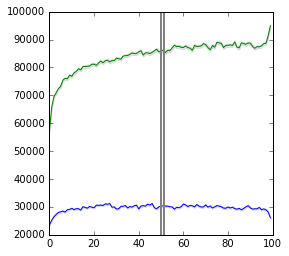

you


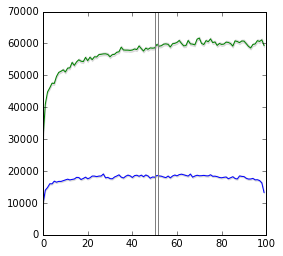

had


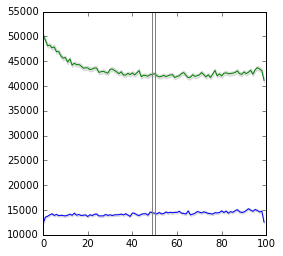

dont


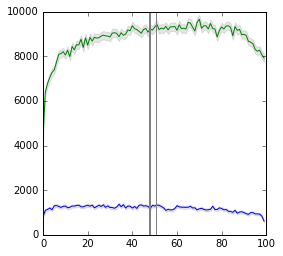

said


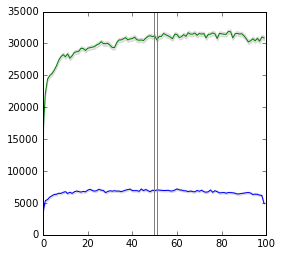

her


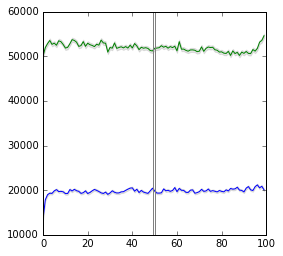

which


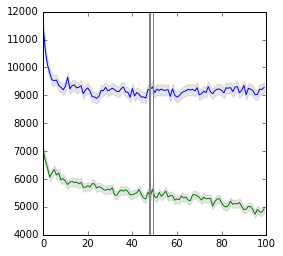

think


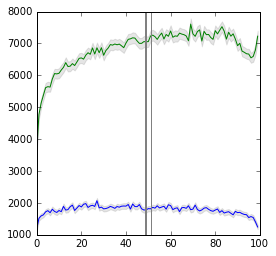

of


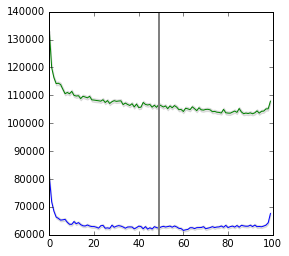

will


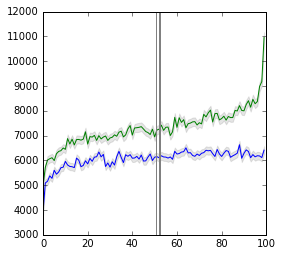

married


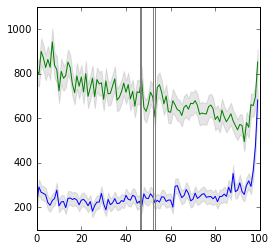

it


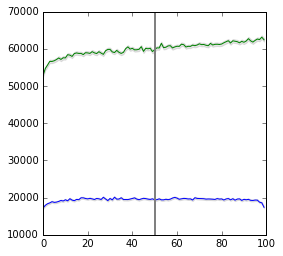

marriage


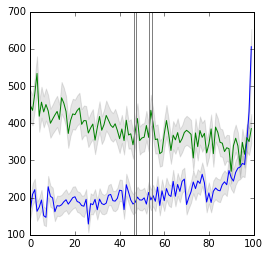

do


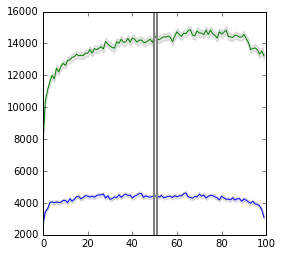

months


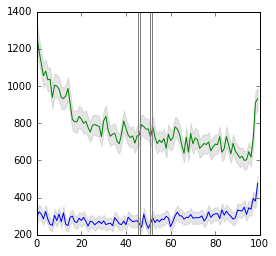

what


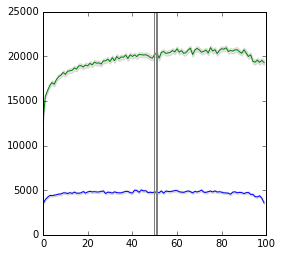

friends


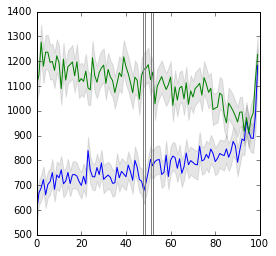

get


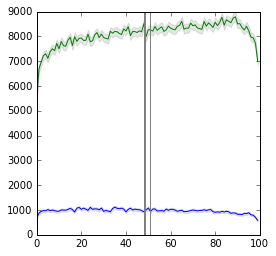

crime


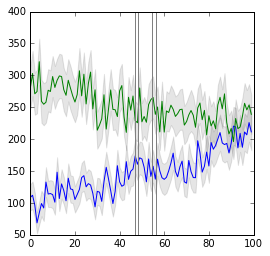

since


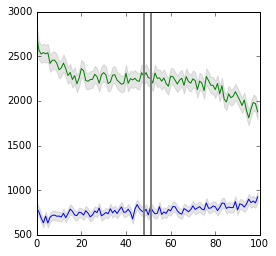

we


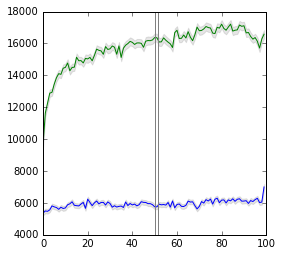

father


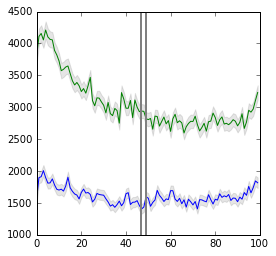

day


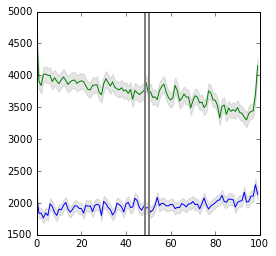

years


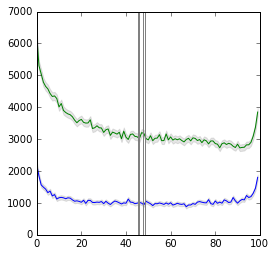

down


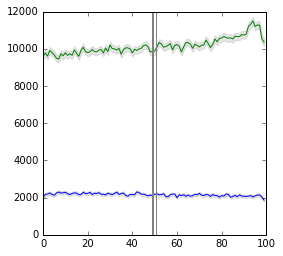

been


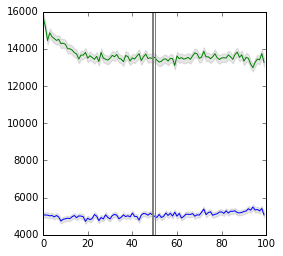

want


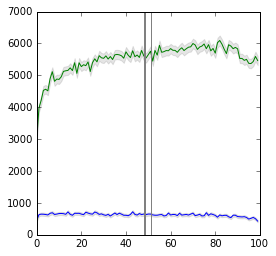

up


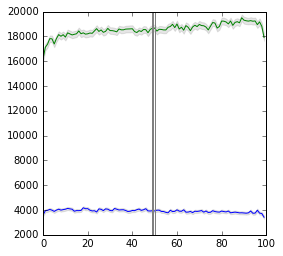

often


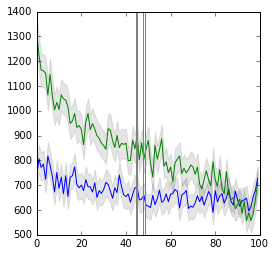

cant


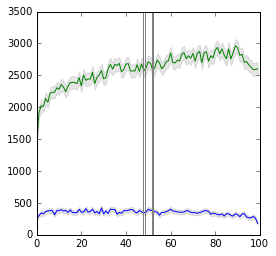

fire


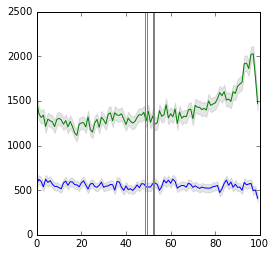

wont


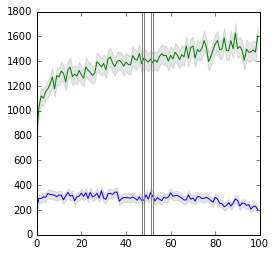

wife


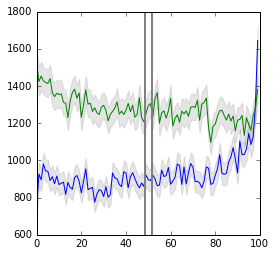

me


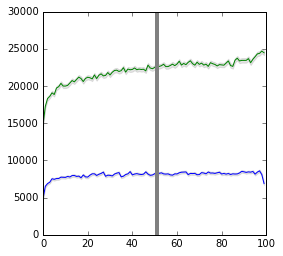

out


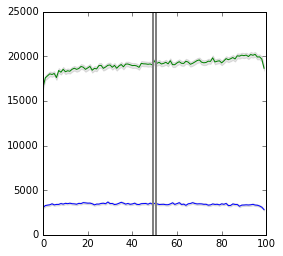

husband


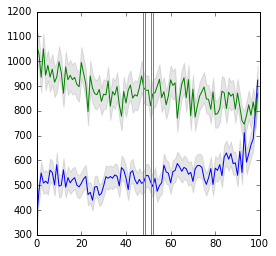

who


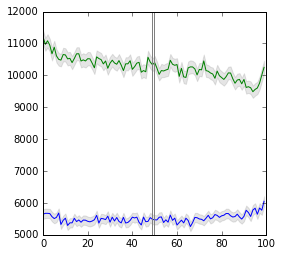

about


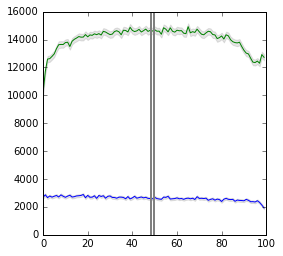

us


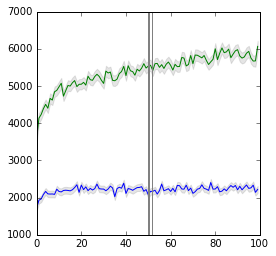

name


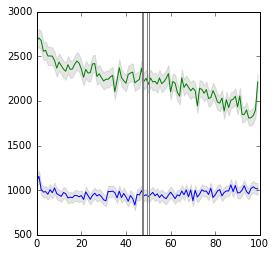

most


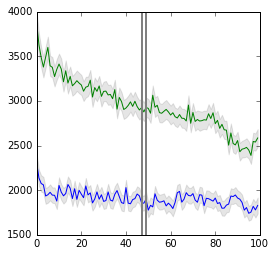

its


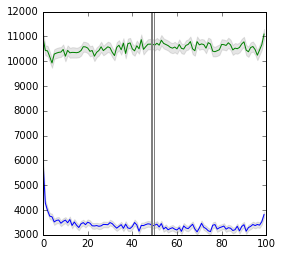

going


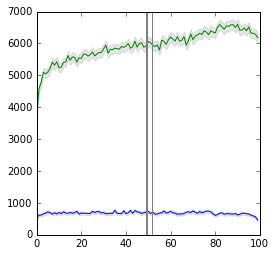

by


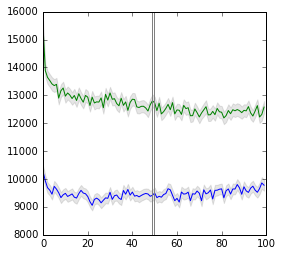

go


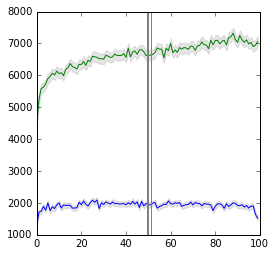

know


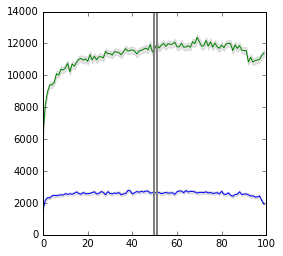

during


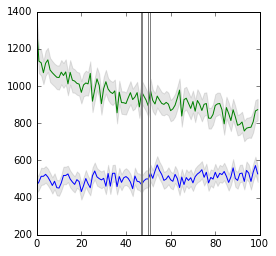

very


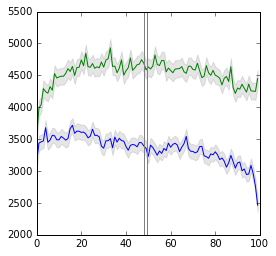

court


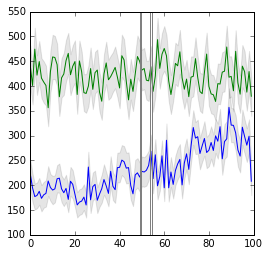

head


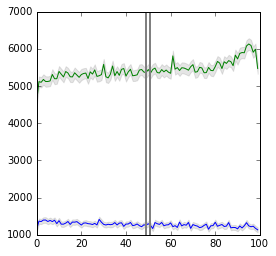

im


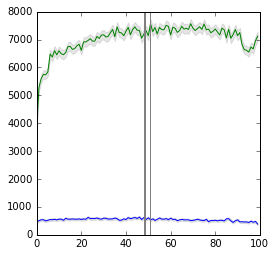

little


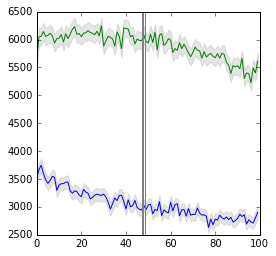

public


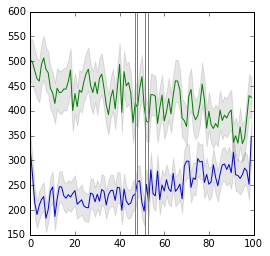

year


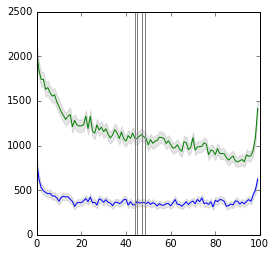

once


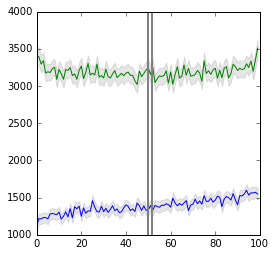

whom


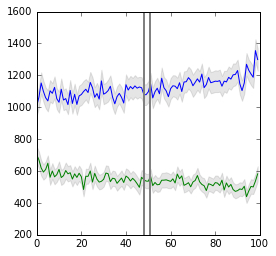

are


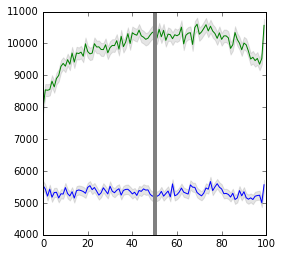

right


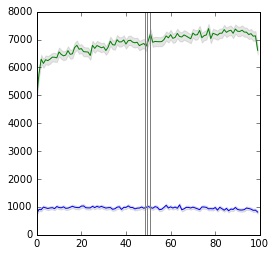

well


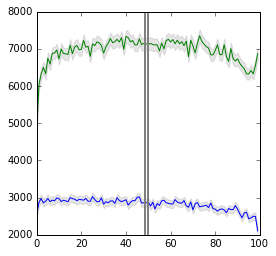

something


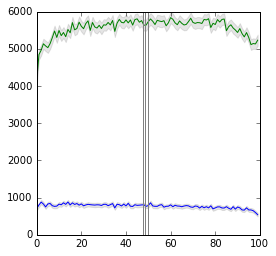

lived


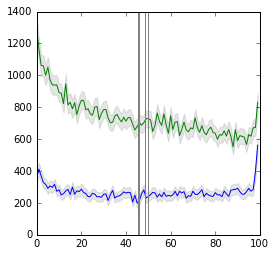

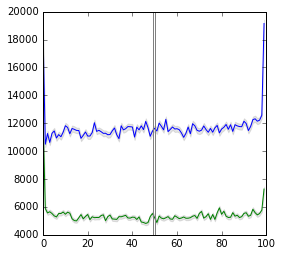

woman


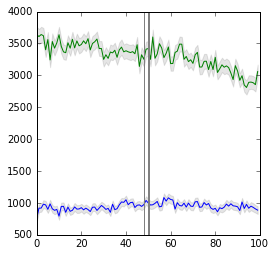

victim


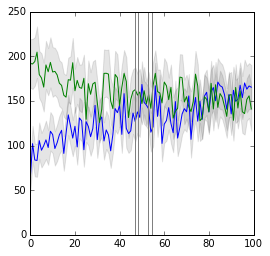

prison


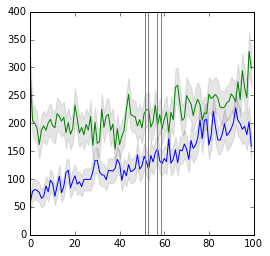

try


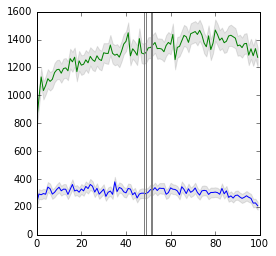

met


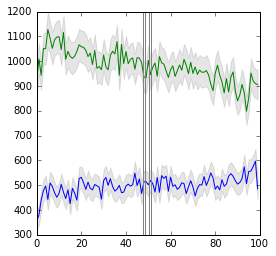

if


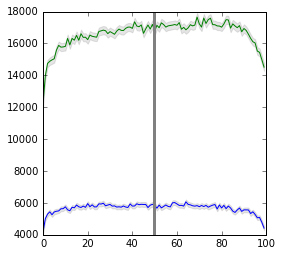

kill


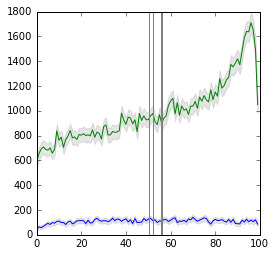

why


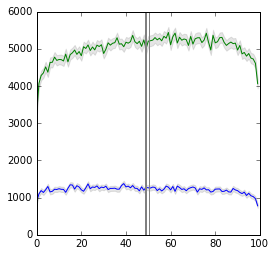

their


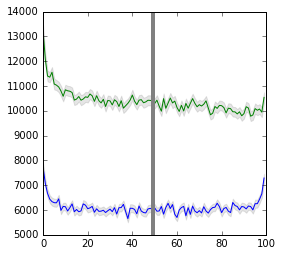

looking


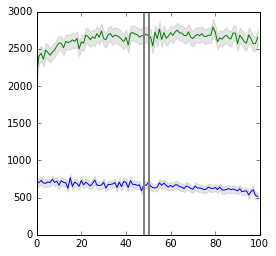

thats


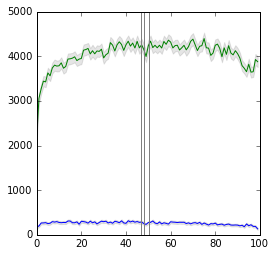

ill


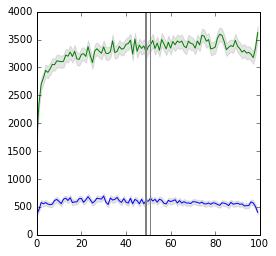

days


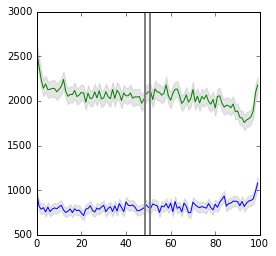

in


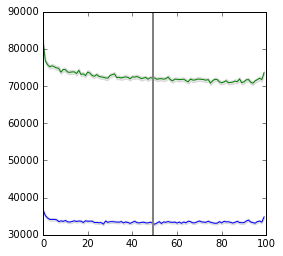

afraid


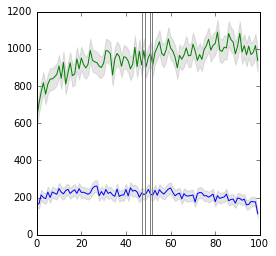

for


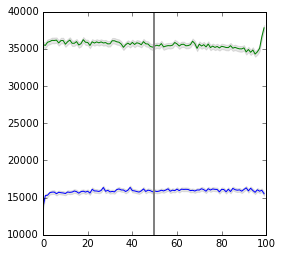

sure


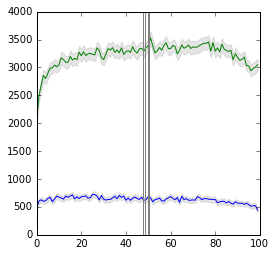

she


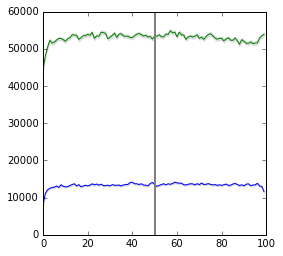

that


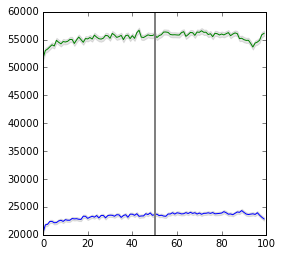

law


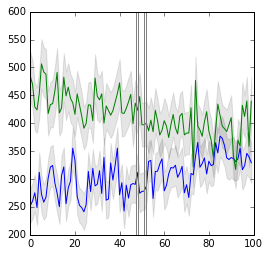

them


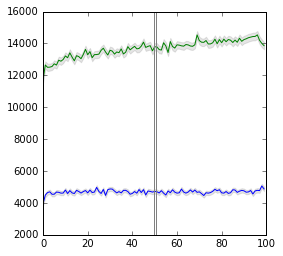

from


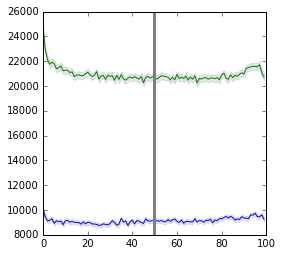

intelligence


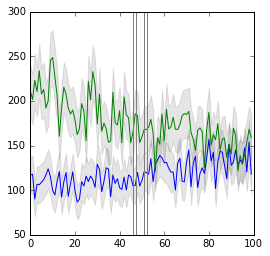

death


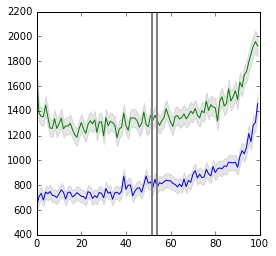

figure


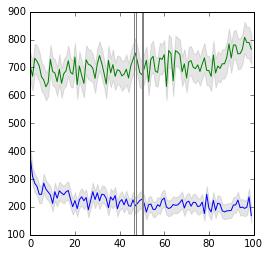

please


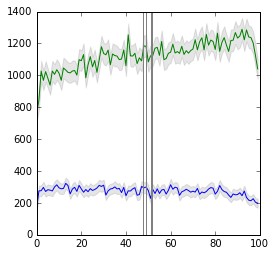

yes


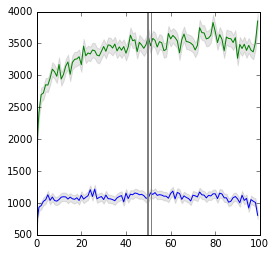

got


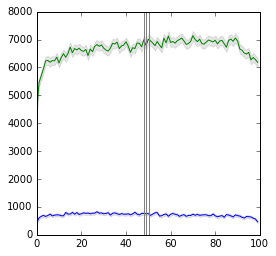

york


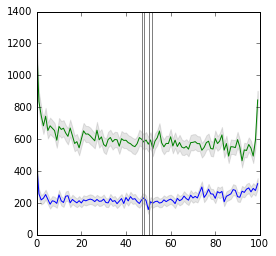

didnt


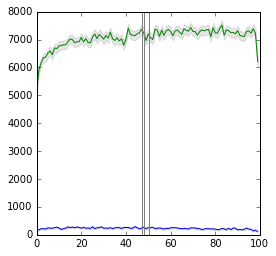

see


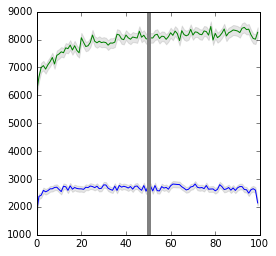

pale


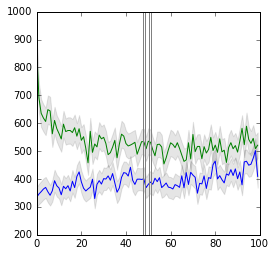

an


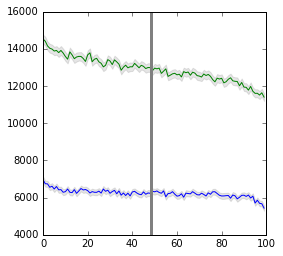

thing


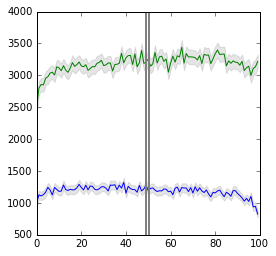

paper


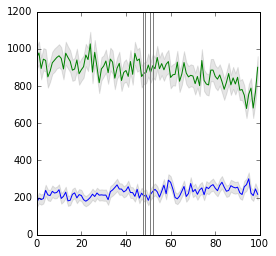

private


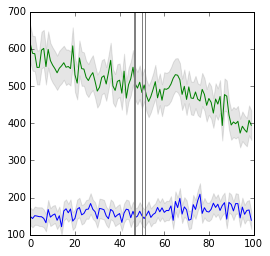

theres


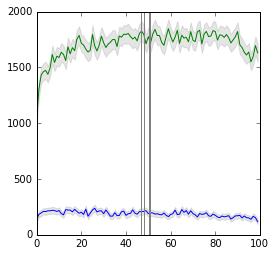

a


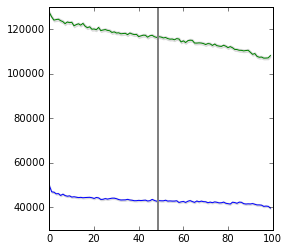

In [103]:
for token in df['token'].head(100):
    plot_coms(token)